# Taiwan Credit Card Default

## UCI Machine Learning Library
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [2]:
filename = 'default of credit card clients.xls'
data = pd.read_excel(filename, skiprows = 1)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
X = data.iloc[:,1:24]
print(X[1:5])

   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
1      0  ...       2682       3272       3455       3261         0      1000   
2      0  ...      13559      14331      14948      15549      1518      1500   
3      0  ...      49291      28314      28959      29547      2000      2019   
4      0  ...      35835      20940      19146      19131      2000     36681   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
1      1000      1000         0      2000  
2      1000      1000      1000      5000  
3      1200      1100      1069      1000  
4     10000      9000       689       679 

In [4]:
y = data['default payment next month']
print(y[1:5])

1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64


In [5]:
y.value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

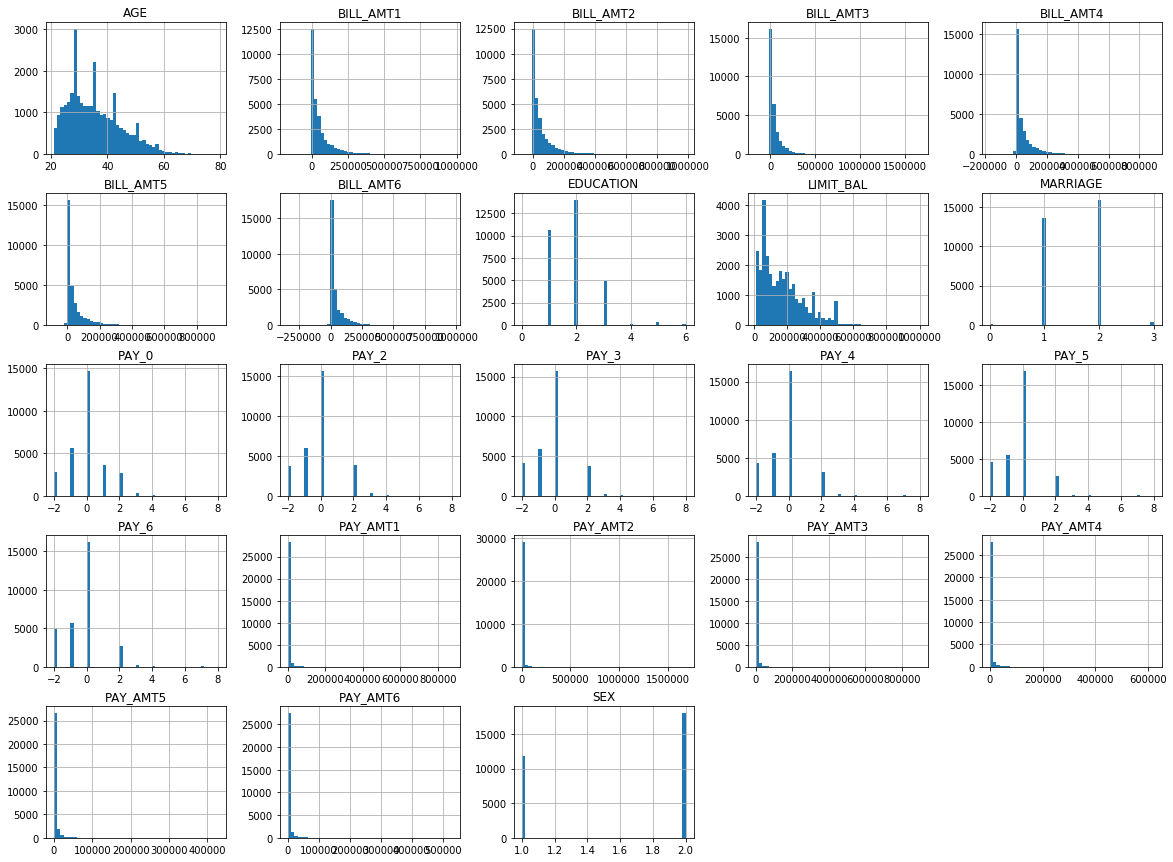

In [6]:
%matplotlib inline
X.hist(bins=50, figsize=(20,15))
plt.show()

## Random Forests

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [8]:
# function to plot the ROC curves
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

### Split data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [10]:
y_train.value_counts()

0    17491
1     5009
Name: default payment next month, dtype: int64

### Baseline model

In [11]:
RandF = RandomForestClassifier(n_estimators=300, oob_score=True, random_state=42)

In [12]:
RandF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300, oob_score=True, random_state=42)

In [13]:
y_pred_baseline = RandF.predict(X_test)
score_baseline = accuracy_score(y_pred_baseline, y_test)
print('Score: ' + str(score_baseline))

Score: 0.8148


In [14]:
confusion_matrix(y_test, y_pred_baseline)

array([[5525,  348],
       [1041,  586]], dtype=int64)

In [15]:
recall_score(y_test, y_pred_baseline, pos_label=1)

0.3601720958819914

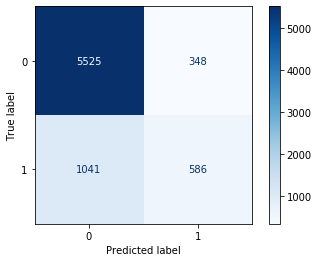

In [16]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(RandF, X_test, y_test, cmap=plt.cm.Blues)

In [17]:
print(classification_report(y_test, y_pred_baseline))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5873
           1       0.63      0.36      0.46      1627

    accuracy                           0.81      7500
   macro avg       0.73      0.65      0.67      7500
weighted avg       0.80      0.81      0.79      7500



In [18]:
y_pred_prob_baseline = RandF.predict_proba(X_test)[:,1]
auc_baseline = roc_auc_score(y_test, y_pred_prob_baseline)
print('AUC: %.2f' % auc_baseline)

AUC: 0.76


### Out-of-bag error

In [19]:
num_trees = np.linspace(1, 300, num = 300, dtype=int)
#num_trees

In [20]:
error_rate = []

for i in num_trees:
    RandF.set_params(n_estimators=i)
    RandF.fit(X_train, y_train)
    
    # Record the OOB error for each `n_estimators = i` setting.
    oob_error = 1 - RandF.oob_score_
    error_rate.append(oob_error)

C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probab

C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [21]:
#error_rate

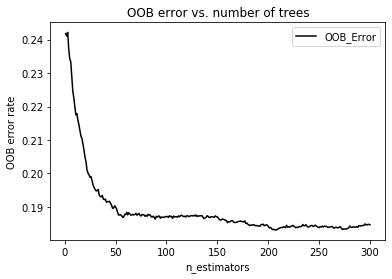

In [22]:
plt.plot(num_trees, error_rate, color='black', label='OOB_Error')
plt.xlabel('n_estimators')
plt.ylabel('OOB error rate')
plt.title('OOB error vs. number of trees')
plt.legend()
plt.show()

### Tune hyperparameters

In [23]:
from sklearn.model_selection import RandomizedSearchCV

In [24]:
# Number of trees
n_estimators = [100, 200, 300, 400, 500]

# Maximum number of levels in tree
#max_depth = np.linspace(1, 20, num = 20, dtype=int)
#max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]

# maximum number of features to consider at each split
max_features = ['auto', 'sqrt', 'log2']
max_features.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 10, 15, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 5, 7, 10, 15]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create random grid
grid = {#'n_estimators': n_estimators,
        'max_features': max_features,
        #'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap
       }

In [25]:
RF = RandomForestClassifier(n_estimators=300, random_state=42)

In [26]:
from sklearn.model_selection import StratifiedKFold

In [27]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [28]:
search = RandomizedSearchCV(RF, grid, cv=kfold, n_iter=50, verbose=2, n_jobs=-1, random_state=42)
#search = RandomizedSearchCV(xgb, params, cv=kfold, n_iter=50, scoring = 'f1', n_jobs=-1, random_state=2)
#search = RandomizedSearchCV(xgb, params, cv=kfold, n_iter=50, scoring = 'roc_auc', n_jobs=-1, random_state=2)
#search = RandomizedSearchCV(xgb, params, cv=kfold, n_iter=50, scoring = 'recall', n_jobs=-1, random_state=2)

In [29]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(n_estimators=300,
                                                    random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 3, 5, 7, 10,
                                                             15],
                                        'min_samples_split': [2, 3, 5, 10, 15,
                                                              20]},
                   random_state=42, verbose=2)

In [30]:
search.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 7,
 'max_features': None,
 'bootstrap': True}

In [31]:
print("Best score: {:.5f}".format(search.best_score_))

Best score: 0.82040


### Prediction performance

In [32]:
y_pred = search.predict(X_test)
score = accuracy_score(y_pred, y_test)
print('Score: ' + str(score))

Score: 0.8194666666666667


In [33]:
confusion_matrix(y_test, y_pred)

array([[5553,  320],
       [1034,  593]], dtype=int64)

In [34]:
recall_score(y_test, y_pred, pos_label=1)

0.36447449293177625

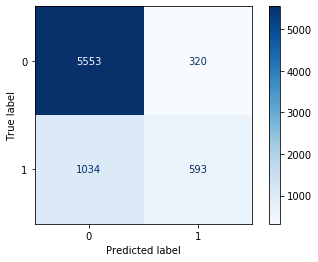

In [35]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(search, X_test, y_test, cmap=plt.cm.Blues)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5873
           1       0.65      0.36      0.47      1627

    accuracy                           0.82      7500
   macro avg       0.75      0.65      0.68      7500
weighted avg       0.80      0.82      0.80      7500



### Plot tree

In [37]:
bst = search.best_estimator_

In [38]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(bst.estimators_[0], 
                           feature_names=X_train.columns,
                           class_names=["Non-default","Default"], 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph

### ROC Curve

In [39]:
y_pred_prob = search.predict_proba(X_test)[:,1]

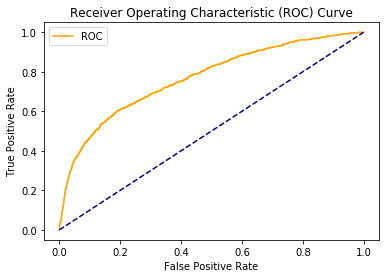

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plot_roc_curve(fpr, tpr)

In [41]:
auc = roc_auc_score(y_test, y_pred_prob)
print('AUC: %.2f' % auc)

AUC: 0.77


### Predictor importance

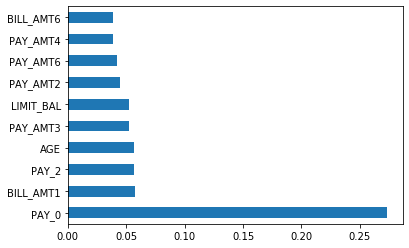

In [42]:
feature_importances = pd.Series(bst.feature_importances_, index = X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')

### Permutation feature importance

In [43]:
from sklearn.inspection import permutation_importance

In [44]:
#result = permutation_importance(bst, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
result = permutation_importance(bst, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2)

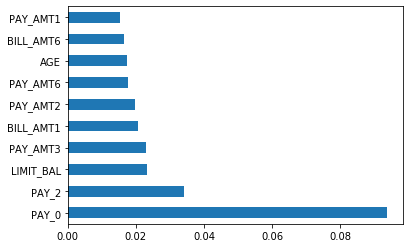

In [45]:
permutation_importances = pd.Series(result.importances_mean, index=X_train.columns)
permutation_importances.nlargest(10).plot(kind='barh')